<a href="https://colab.research.google.com/github/Zircornn-Black/DSF_Group-6/blob/main/Project_Ph4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

Objectives:
1.	Understand Household Electricity Consumption Patterns: The primary objective of this project is to gain insights into the household's electricity consumption patterns over time. This includes analyzing the trends, seasonality, and any other relevant patterns in the various electricity-related variables.
2.	Identify Factors Influencing Electricity Consumption: The project aims to identify the key factors that influence the household's electricity consumption, such as time of day, day of the week, seasons, and the usage of specific appliances (sub-metering data).
3.	Develop Predictive Models: Using the time series data, the project may involve developing predictive models to forecast future electricity consumption patterns. This could help the household better manage its energy usage and costs.
4.	Optimize Energy Efficiency: The insights gained from the analysis can be used to identify opportunities for improving energy efficiency within the household, such as identifying high-consumption appliances or periods of the day/week with peak demand.
Potential Business Applications:
1.	Household Energy Management: The analysis can help the household better understand its energy consumption patterns and make informed decisions to optimize energy usage and reduce costs.
2.	Utility Company Insights: The project's findings could provide valuable insights to utility companies about residential electricity consumption patterns, which could aid in grid management, demand forecasting, and the development of targeted energy efficiency programs.
3.	Energy Policy and Planning: The project's insights could contribute to the development of energy policies and planning initiatives that aim to promote energy efficiency and sustainability at the household and community levels.
4.	Research and Development: The dataset and analysis could be used for further research and development in the areas of smart home technologies, energy management systems, and the optimization of household energy consumption.
Overall, this time series project on household electricity consumption has the potential to provide valuable insights that can benefit the household, utility companies, policymakers, and researchers in the energy and sustainability domains.

# Data Understanding and Loading

In [ ]:
#Importing libraries
import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
#Data Loading
df = pd.read_csv('/content/household_power_consumption[1].txt', sep=';',
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')

<ipython-input-5-0372d1d04bbf>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/household_power_consumption[1].txt', sep=';',
<ipython-input-5-0372d1d04bbf>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/household_power_consumption[1].txt', sep=';',


In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32193 entries, 2006-12-16 17:24:00 to 2007-01-08 01:56:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    32189 non-null  float64
 1   Global_reactive_power  32189 non-null  float64
 2   Voltage                32189 non-null  float64
 3   Global_intensity       32189 non-null  float64
 4   Sub_metering_1         32189 non-null  float64
 5   Sub_metering_2         32188 non-null  float64
 6   Sub_metering_3         32188 non-null  float64
dtypes: float64(7)
memory usage: 2.0 MB


In [ ]:
df.shape

(32193, 7)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,877093.0,1.111406,1.138342,0.076,0.288,0.536,1.546,10.67
Global_reactive_power,877093.0,0.119823,0.110683,0.000,0.000,0.100,0.190,1.39
Voltage,877093.0,239.818568,3.364830,223.490,237.740,240.090,242.070,252.14
Global_intensity,877093.0,4.736537,4.801922,0.200,1.200,2.400,6.400,46.40
Sub_metering_1,877093.0,1.200663,6.387026,0.000,0.000,0.000,0.000,79.00
Sub_metering_2,877093.0,1.542844,6.511209,0.000,0.000,0.000,1.000,78.00
Sub_metering_3,877093.0,5.913602,8.203800,0.000,0.000,0.000,17.000,31.00


# Data Cleaning

In [28]:
#Checking for missing values
df.isnull().sum()

Global_active_power      3947
Global_reactive_power    3947
Voltage                  3947
Global_intensity         3947
Sub_metering_1           3947
Sub_metering_2           3947
Sub_metering_3           3947
dtype: int64

In [29]:
#Checking for duplicates
df.duplicated().sum()

66558

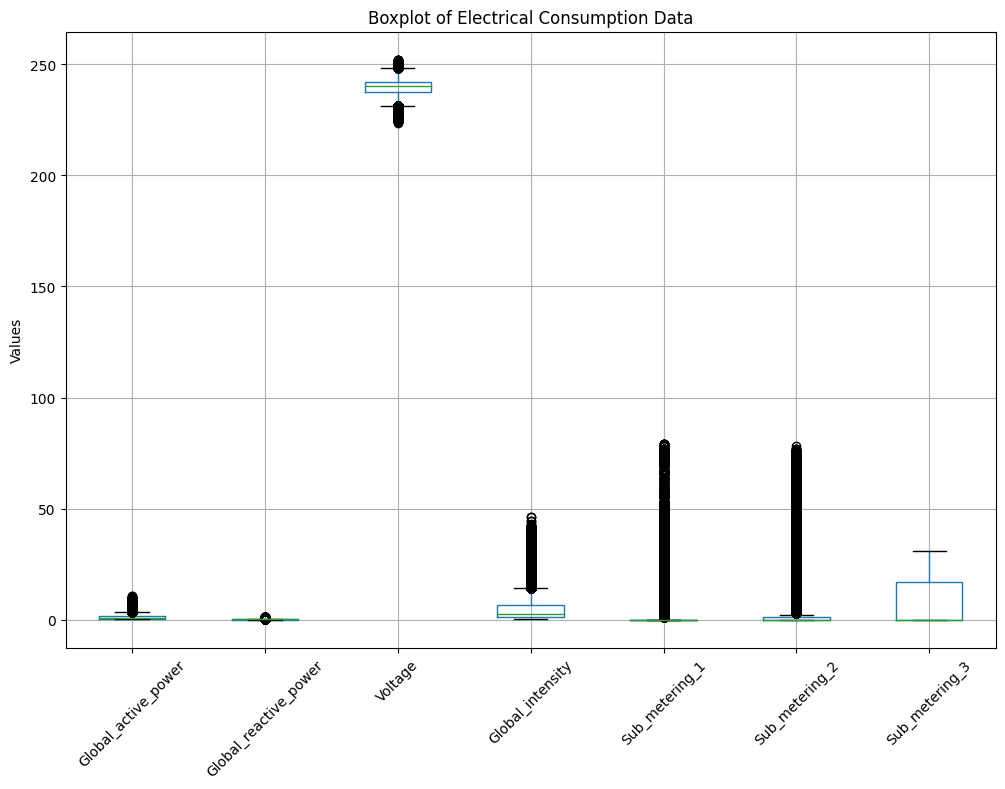

In [30]:
#Checking for outliers
plt.figure(figsize=(12, 8))
df.boxplot(column=['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])
plt.title('Boxplot of Electrical Consumption Data')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

We have no outliers

# Data Visualiation and EDA

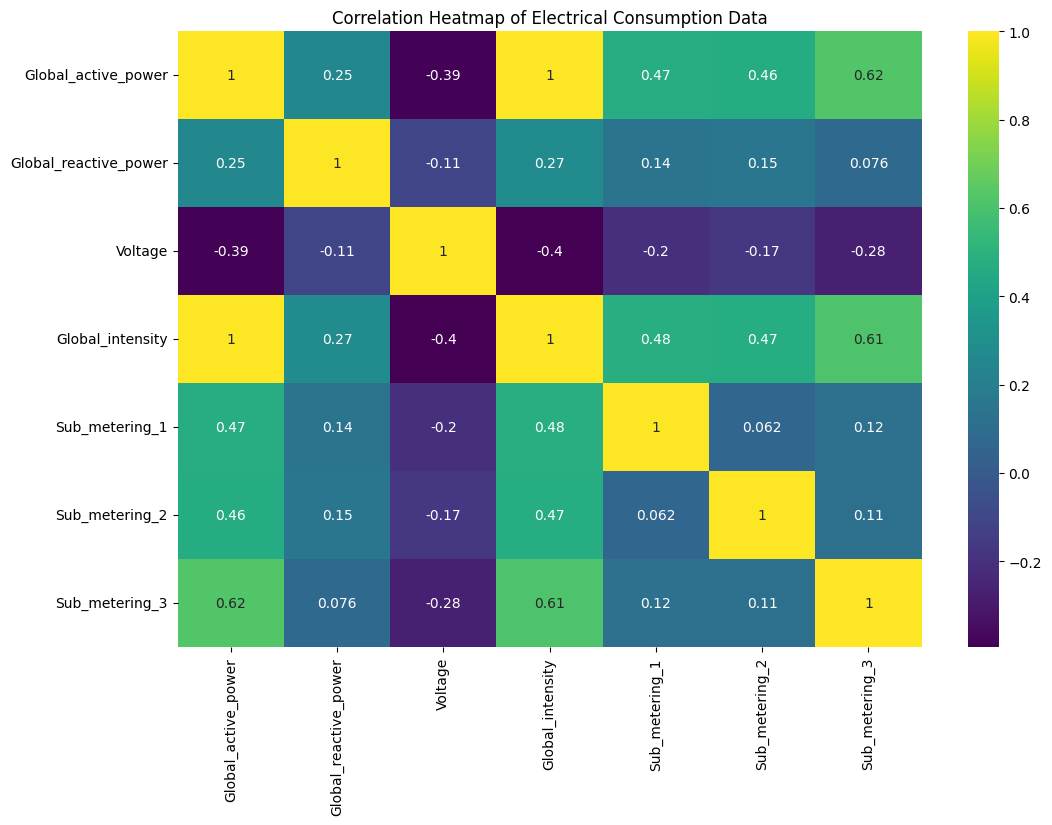

In [34]:
#Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Electrical Consumption Data')
plt.show()

In [36]:
#Highly correlated features summary
corr_matrix = df.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.5)]

print(f"The following {len(to_drop)} features are highly correlated (|r| > 0.5):")
print(', '.join(to_drop))

The following 2 features are highly correlated (|r| > 0.5):
Global_intensity, Sub_metering_3


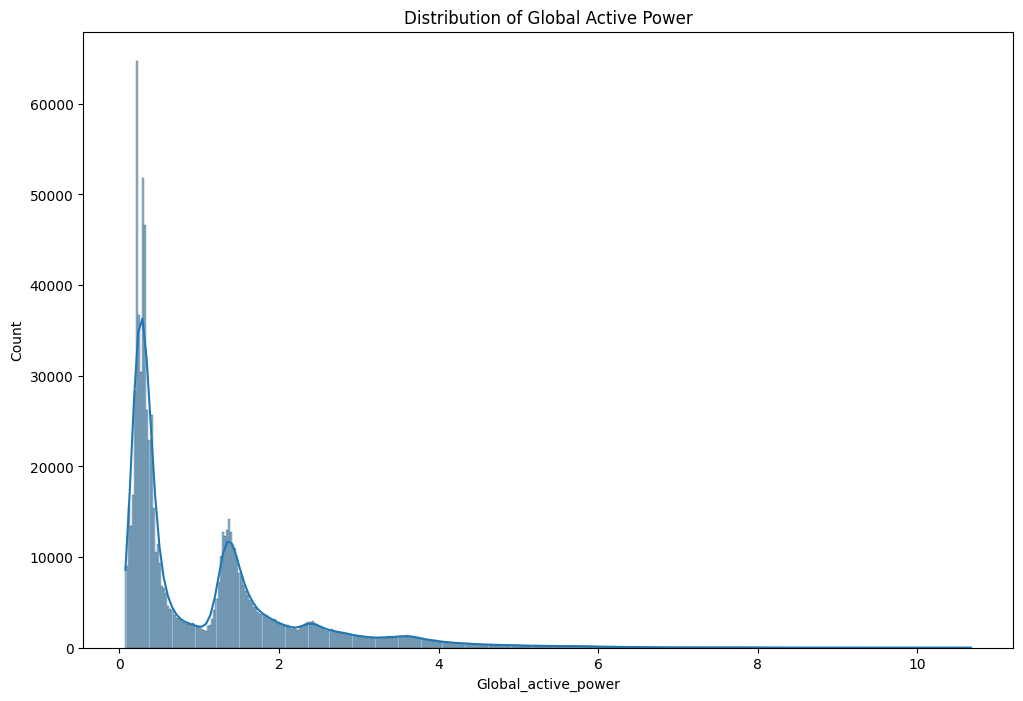

In [37]:
#Univariate analysis on Global active power
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Global_active_power', kde=True)
plt.title('Distribution of Global Active Power')
plt.show()

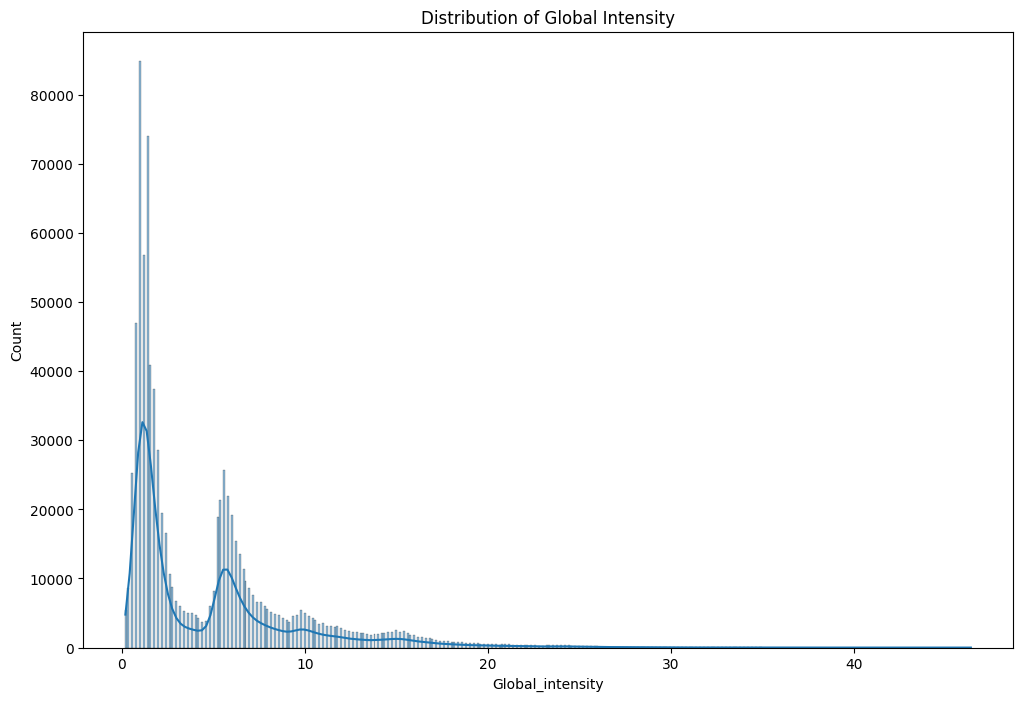

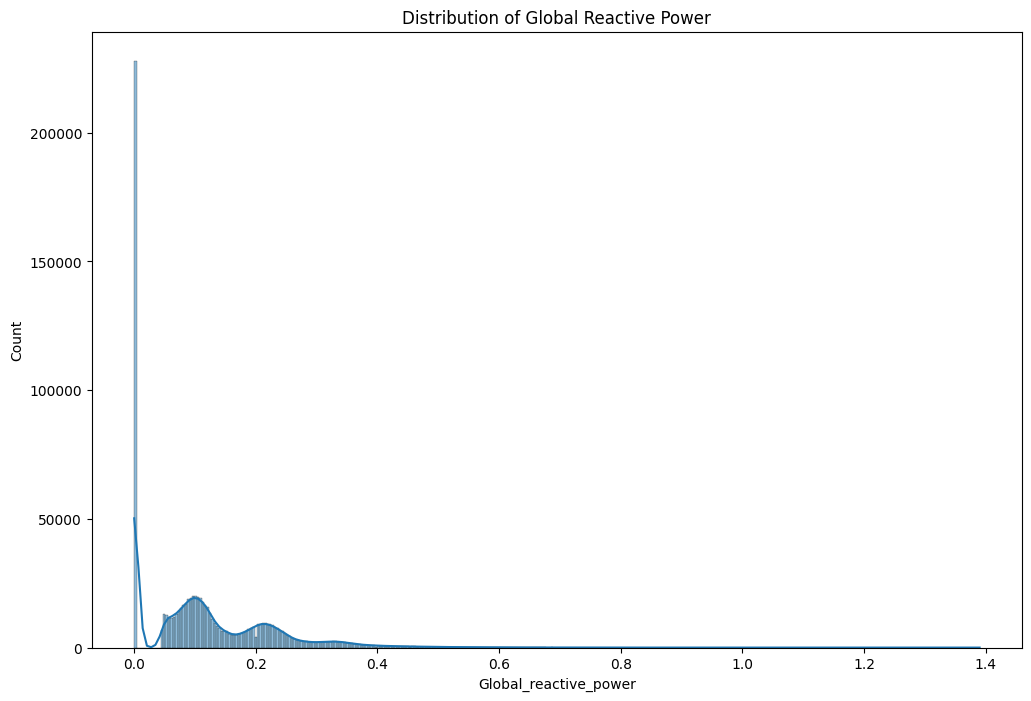

In [41]:
##Univariate analysis on Global reactive power and Global intensity
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Global_intensity', kde=True)
plt.title('Distribution of Global Intensity')
plt.show()
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Global_reactive_power', kde=True)
plt.title('Distribution of Global Reactive Power')
plt.show()

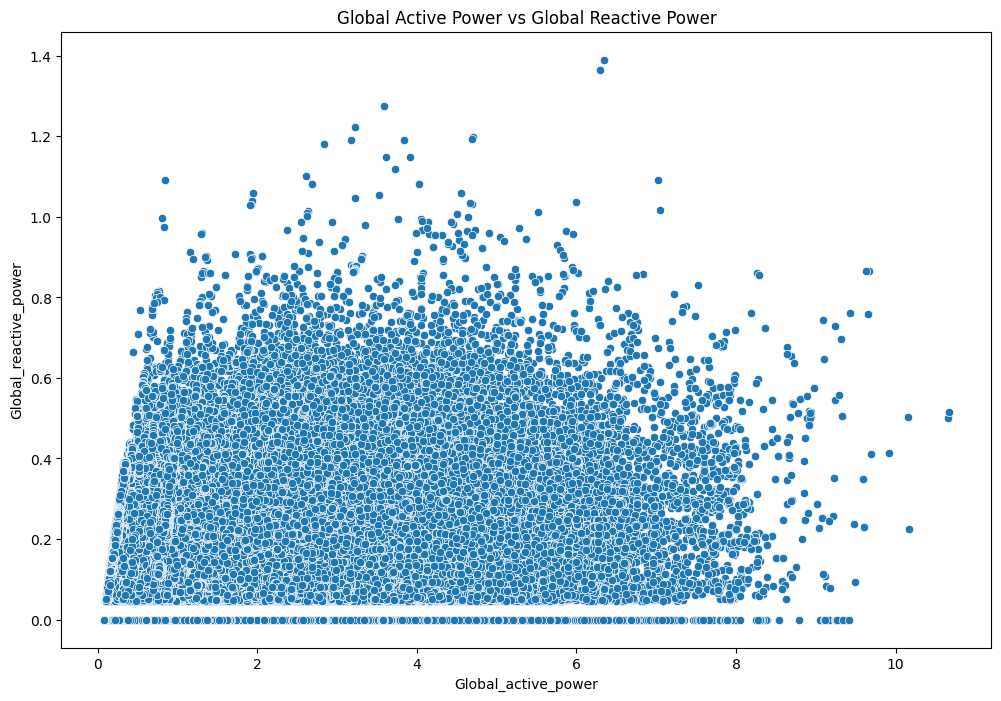

In [45]:
#plotting global active power vs global reactive power
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Global_active_power', y='Global_reactive_power')
plt.title('Global Active Power vs Global Reactive Power')
plt.show()

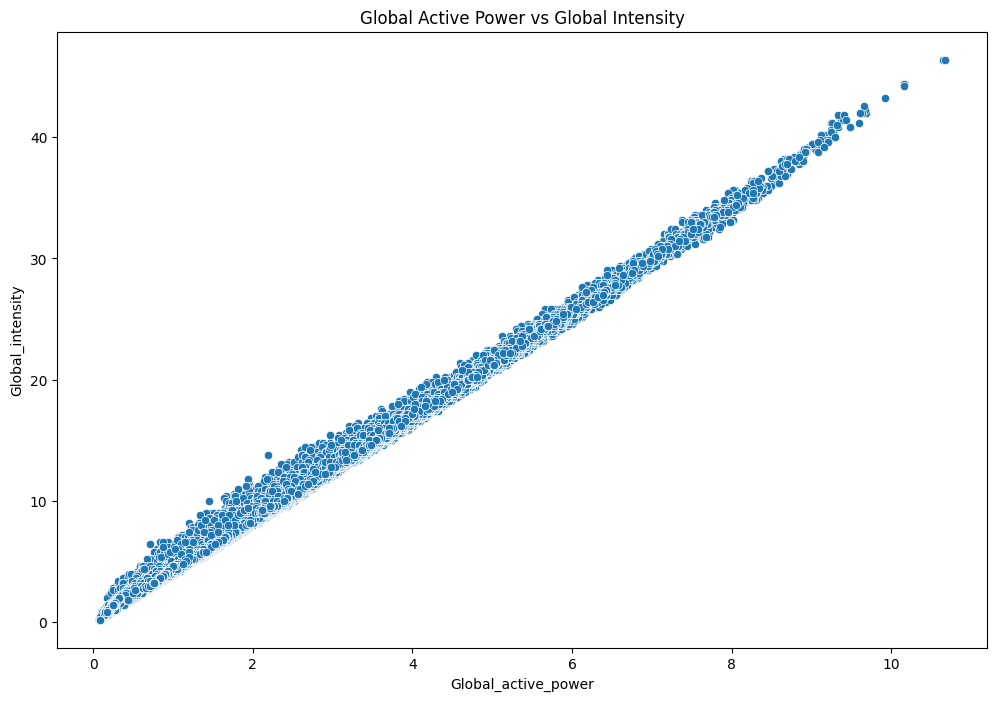

In [47]:
#plotting global active power vs global intensity
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Global_active_power', y='Global_intensity')
plt.title('Global Active Power vs Global Intensity')
plt.show()

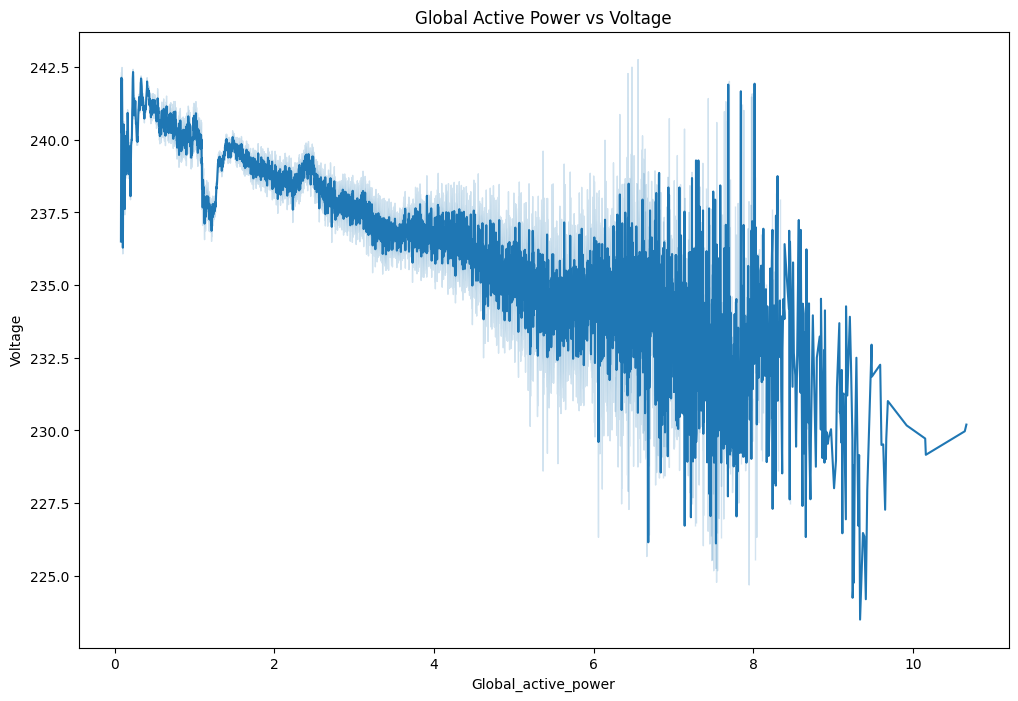

In [49]:
#plotting global active power and voltage line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Global_active_power', y='Voltage')
plt.title('Global Active Power vs Voltage')
plt.show()


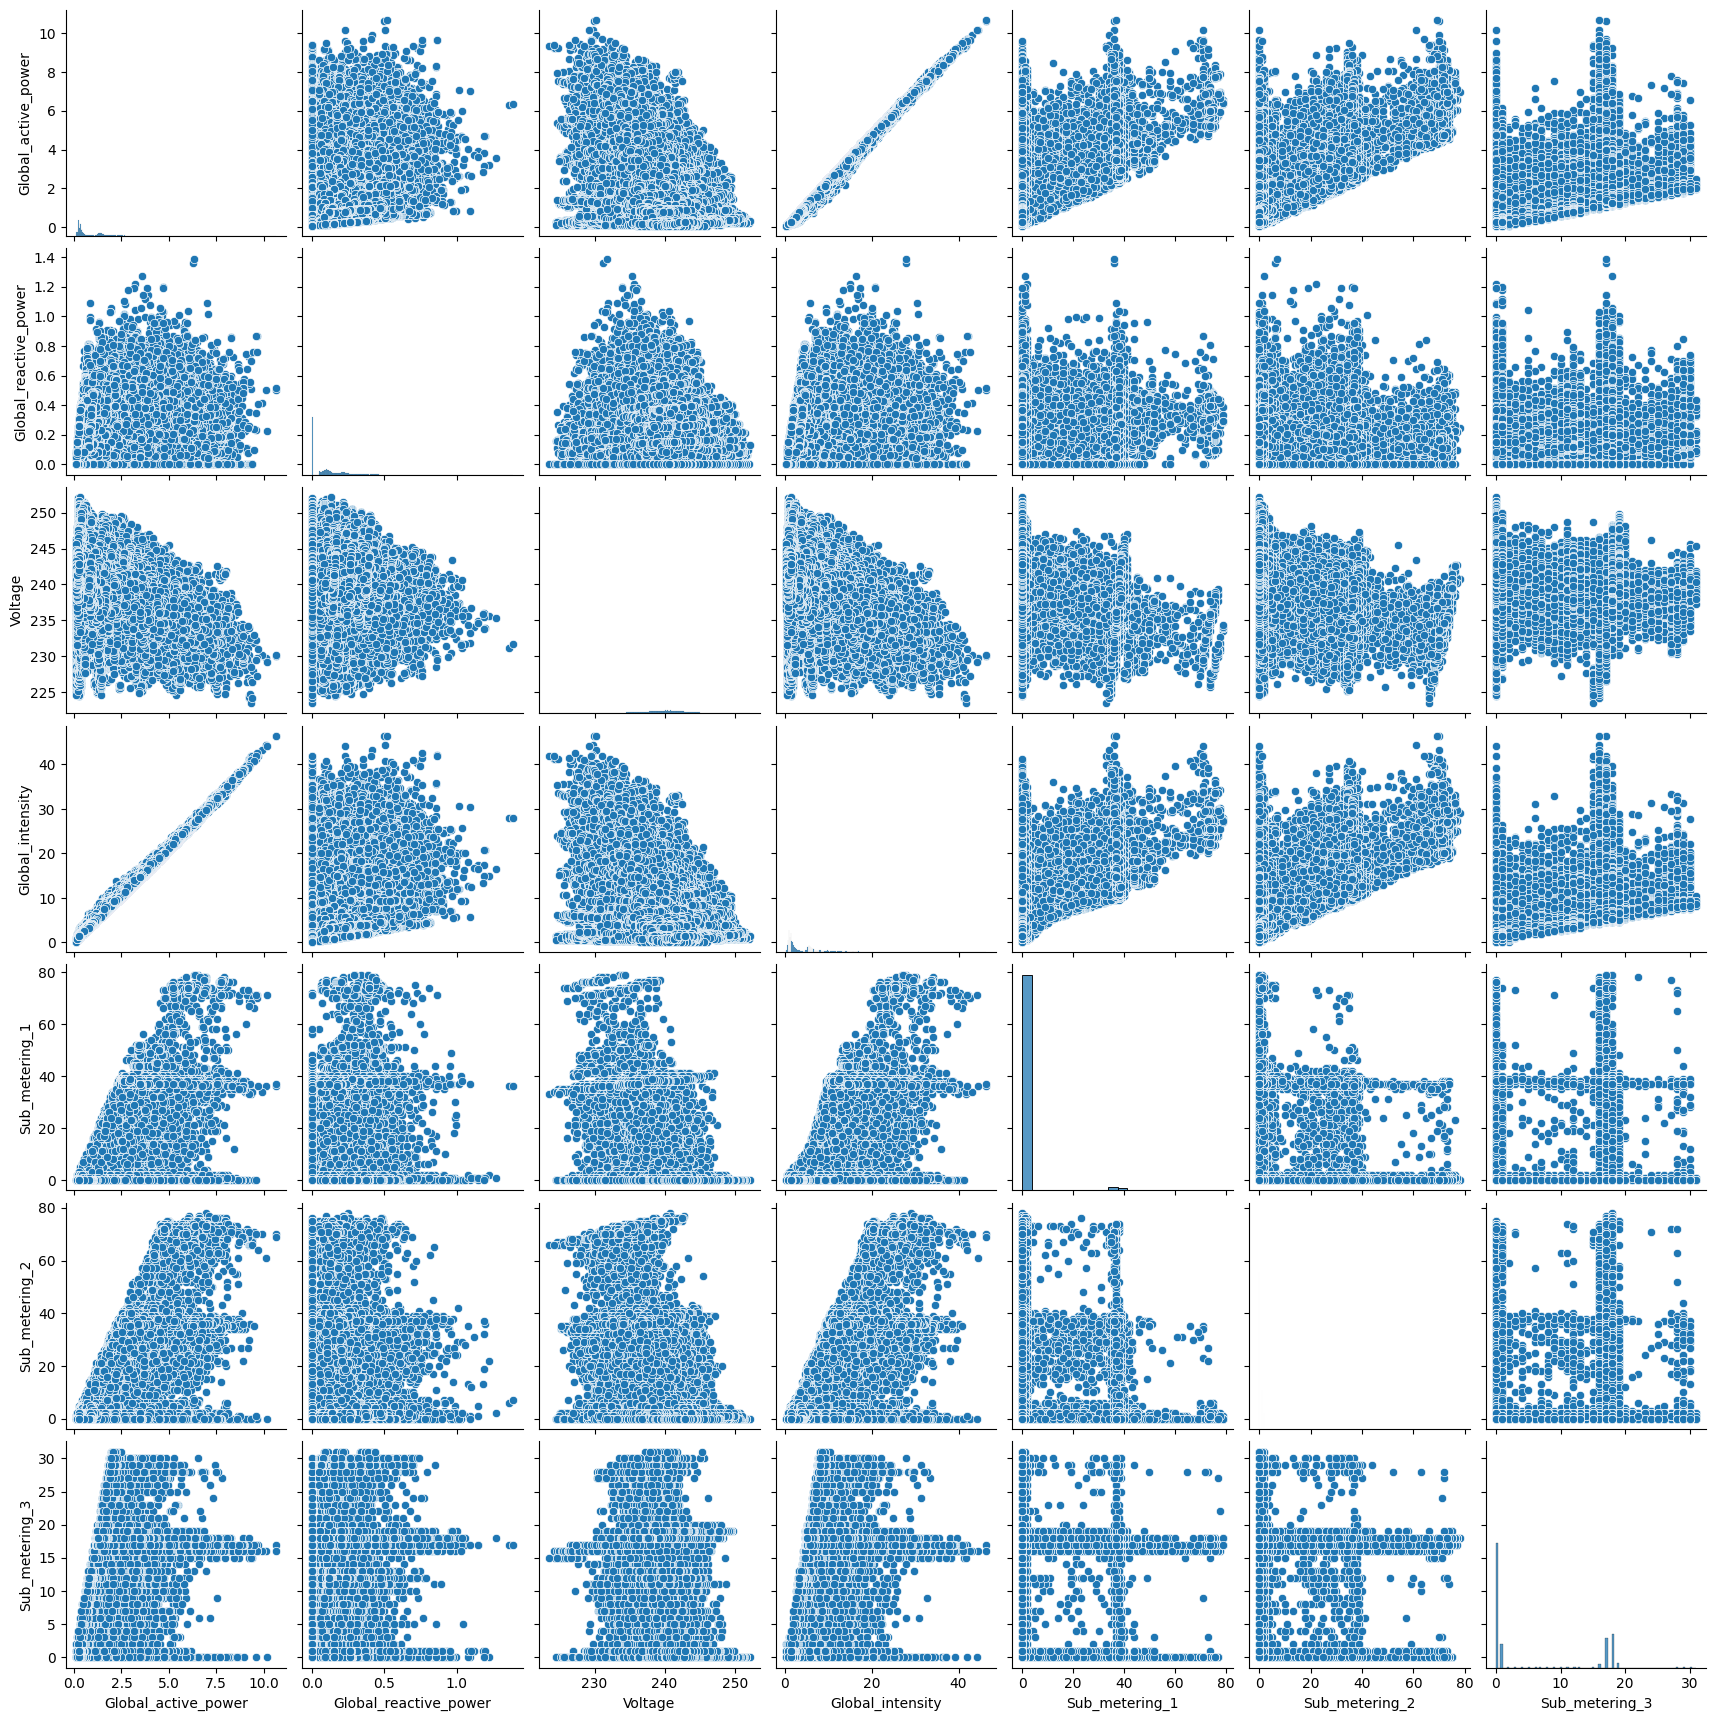

In [50]:
#multivariate analysis for all features
sns.pairplot(df)
plt.show()

In [52]:
#Checking the distribution of out data
df.skew()

Global_active_power      1.766235
Global_reactive_power    1.221733
Voltage                 -0.331891
Global_intensity         1.822038
Sub_metering_1           5.680198
Sub_metering_2           6.139632
Sub_metering_3           0.752055
dtype: float64

<ipython-input-53-a771818689ed>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Global_active_power'])


<Axes: xlabel='Global_active_power', ylabel='Density'>

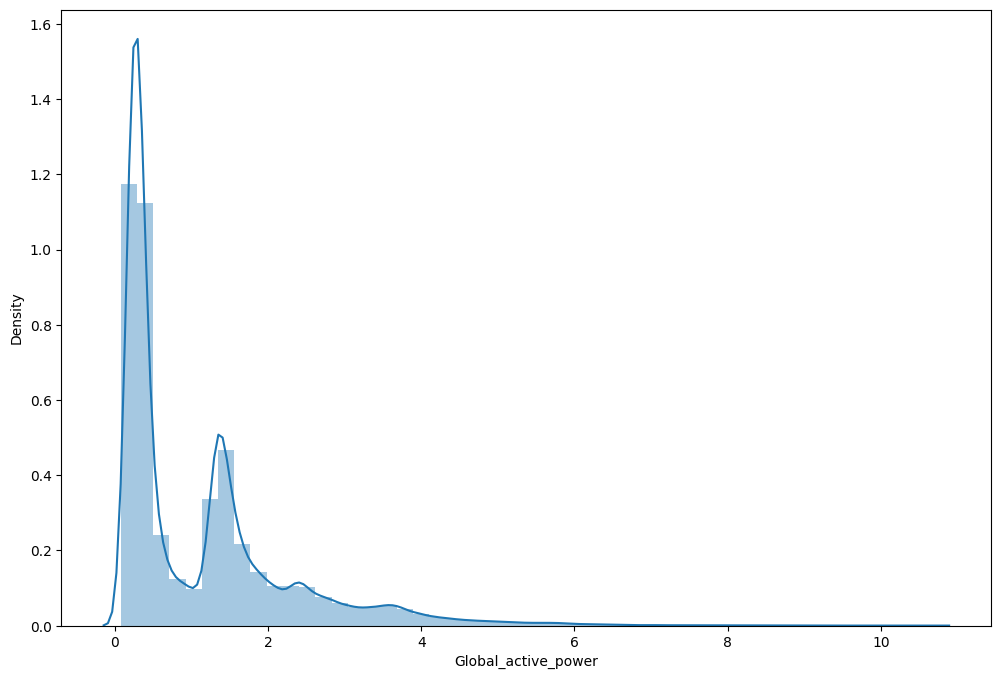

In [53]:
#Checking if our data is normally distributed
plt.figure(figsize=(12, 8))
sns.distplot(df['Global_active_power'])